# 전처리

In [19]:
df = pd.read_excel("Data/최종 프로젝트/국내 GDP.xlsx")
df

,Unnamed: 0,20141/4,20142/4,20143/4,20144/4,20151/4,20152/4,20153/4,20154/4,20161/4,...,20223/4,20224/4,20231/4,20232/4,20233/4,20234/4,20241/4,20242/4,20243/4,20244/4
0,국내총생산(명목GDP),"392,080.6","407,696.0","411,863.3","426,844.9","414,691.5","431,746.3","440,884.8","453,453.4","436,001.1",...,"589,087.9","601,050.1","565,523.0","594,615.9","612,801.3","635,747.1","608,186.6","636,205.4","643,531.6","668,933.8"
1,경제성장률(실질GDP성장률),3.8,3.6,3.0,2.6,2.7,1.9,3.5,3.6,3.0,...,3.4,1.3,1.3,1.2,1.5,2.2,3.4,2.2,1.4,1.1


In [26]:
df2 = pd.read_excel("Data/최종 프로젝트/기준금리.xlsx")
df2 = df2[df2["date"] >= "2014-01-01"].reset_index(drop=True)
df2

,date,rate,year,month,day
0,2014-01-01,2.50,2014,1,1
1,2014-01-02,2.50,2014,1,2
2,2014-01-03,2.50,2014,1,3
3,2014-01-04,2.50,2014,1,4
4,2014-01-05,2.50,2014,1,5
...,...,...,...,...,...
4165,2025-05-28,2.75,2025,5,28
4166,2025-05-29,2.50,2025,5,29
4167,2025-05-30,2.50,2025,5,30
4168,2025-05-31,2.50,2025,5,31


In [33]:
df3 = pd.read_excel("Data/최종 프로젝트/주택매매가격지수.xlsx")
filtered = df3.loc[0][df3.loc[0].index.str.endswith(('03', '06', '09', '12'))]
filtered

2014.03     83.9
2014.06     84.0
2014.09     84.3
2014.12     84.8
2015.03     85.3
2015.06     86.3
2015.09     87.0
2015.12     87.7
2016.03     87.8
2016.06     87.8
2016.09     88.0
2016.12     88.4
2017.03     88.4
2017.06     88.8
2017.09     89.3
2017.12     89.7
2018.03     90.1
2018.06     90.1
2018.09     90.4
2018.12     90.6
2019.03     90.3
2019.06     89.8
2019.09     89.7
2019.12     90.3
2020.03     91.4
2020.06     92.1
2020.09     93.5
2020.12     95.2
2021.03     97.5
2021.06      100
2021.09    102.8
2021.12    104.6
2022.03    104.8
2022.06    104.8
2022.09    103.9
2022.12     99.7
2023.03     96.3
2023.06     95.6
2023.09     96.0
2023.12     96.2
2024.03     95.8
2024.06     95.8
2024.09     96.3
2024.12     96.3
Name: 0, dtype: object

In [34]:
# 1. 월→분기 변환 함수 정의
def month_to_quarter(month_str):
    year, month = month_str.split('.')
    q = (int(month) - 1) // 3 + 1
    return f"{year}{q}/4"

# 2. filtered 인덱스를 분기 형식으로 매핑
mapped_index = filtered.index.map(month_to_quarter)

# 3. 분기 컬럼과 매핑된 Series 만들기
filtered_quarterly = pd.Series(filtered.values, index=mapped_index)

# 4. df.columns 중에 있는 것만 필터링
valid_cols = [col for col in df.columns if col != 'Unnamed: 0']
filtered_quarterly = filtered_quarterly[filtered_quarterly.index.isin(valid_cols)]

# 5. df에 삽입
df.loc[2, valid_cols] = filtered_quarterly
df.loc[2, 'Unnamed: 0'] = '주택매매가격지수'

# 6. 결과 확인
df

,Unnamed: 0,20141/4,20142/4,20143/4,20144/4,20151/4,20152/4,20153/4,20154/4,20161/4,...,20223/4,20224/4,20231/4,20232/4,20233/4,20234/4,20241/4,20242/4,20243/4,20244/4
0,국내총생산(명목GDP),"392,080.6","407,696.0","411,863.3","426,844.9","414,691.5","431,746.3","440,884.8","453,453.4","436,001.1",...,"589,087.9","601,050.1","565,523.0","594,615.9","612,801.3","635,747.1","608,186.6","636,205.4","643,531.6","668,933.8"
1,경제성장률(실질GDP성장률),3.8,3.6,3.0,2.6,2.7,1.9,3.5,3.6,3.0,...,3.4,1.3,1.3,1.2,1.5,2.2,3.4,2.2,1.4,1.1
2,주택매매가격지수,83.9,84.0,84.3,84.8,85.3,86.3,87.0,87.7,87.8,...,103.9,99.7,96.3,95.6,96.0,96.2,95.8,95.8,96.3,96.3


In [35]:
# 1. 마지막 날짜 기준 데이터 추출
df2['date'] = pd.to_datetime(df2['date'])  # 날짜 형식 보장
df2['month'] = df2['date'].dt.month
df2['year'] = df2['date'].dt.year

# 2. 마지막 날짜만 추출 (3,6,9,12월 대상)
target_months = [3, 6, 9, 12]
last_day_rates = (
    df2[df2['month'].isin(target_months)]
    .sort_values('date')
    .groupby(['year', 'month'])
    .tail(1)
)

# 3. 분기형 문자열로 인덱스 생성: 'YYYY3/4' 형식
last_day_rates['quarter_col'] = last_day_rates.apply(lambda row: f"{row['year']}{(row['month']//3)}/4", axis=1)

# 4. 분기 이름 → 금리 매핑 Series 생성
rate_series = pd.Series(last_day_rates['rate'].values, index=last_day_rates['quarter_col'])

# 5. df.columns 중 존재하는 분기만 추출
valid_cols = [col for col in df.columns if col != 'Unnamed: 0']
rate_series = rate_series[rate_series.index.isin(valid_cols)]

# 6. df에 추가 (예: 3번째 행에 삽입)
df.loc[len(df)] = [None] * len(df.columns)  # 빈 행 추가
df.loc[len(df) - 1, 'Unnamed: 0'] = '기준금리(분기말)'
df.loc[len(df) - 1, rate_series.index] = rate_series.values

# ✅ 확인
df

,Unnamed: 0,20141/4,20142/4,20143/4,20144/4,20151/4,20152/4,20153/4,20154/4,20161/4,...,20223/4,20224/4,20231/4,20232/4,20233/4,20234/4,20241/4,20242/4,20243/4,20244/4
0,국내총생산(명목GDP),"392,080.6","407,696.0","411,863.3","426,844.9","414,691.5","431,746.3","440,884.8","453,453.4","436,001.1",...,"589,087.9","601,050.1","565,523.0","594,615.9","612,801.3","635,747.1","608,186.6","636,205.4","643,531.6","668,933.8"
1,경제성장률(실질GDP성장률),3.8,3.6,3.0,2.6,2.7,1.9,3.5,3.6,3.0,...,3.4,1.3,1.3,1.2,1.5,2.2,3.4,2.2,1.4,1.1
2,주택매매가격지수,83.9,84.0,84.3,84.8,85.3,86.3,87.0,87.7,87.8,...,103.9,99.7,96.3,95.6,96.0,96.2,95.8,95.8,96.3,96.3
3,기준금리(분기말),2.5,2.5,2.25,2.0,1.75,1.5,1.5,1.5,1.5,...,2.5,3.25,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.0


In [47]:
# df = df.rename(columns={"Unnamed: 0" : '외부변수'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 45 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   외부변수     4 non-null      object
 1   20141/4  4 non-null      object
 2   20142/4  4 non-null      object
 3   20143/4  4 non-null      object
 4   20144/4  4 non-null      object
 5   20151/4  4 non-null      object
 6   20152/4  4 non-null      object
 7   20153/4  4 non-null      object
 8   20154/4  4 non-null      object
 9   20161/4  4 non-null      object
 10  20162/4  4 non-null      object
 11  20163/4  4 non-null      object
 12  20164/4  4 non-null      object
 13  20171/4  4 non-null      object
 14  20172/4  4 non-null      object
 15  20173/4  4 non-null      object
 16  20174/4  4 non-null      object
 17  20181/4  4 non-null      object
 18  20182/4  4 non-null      object
 19  20183/4  4 non-null      object
 20  20184/4  4 non-null      object
 21  20191/4  4 non-null      object
 22  20192/4  4 

In [1]:
df.to_excel("Data/최종 프로젝트/외부변수.xlsx", index=False)
df

NameError: name 'df' is not defined

----

# 분석

In [2]:
import pandas as pd
df_profit = pd.read_excel("Data/최종 프로젝트/수익성 지표 데이터.xlsx")
df_profit

,금융회사,금융회사코드,권역금융회사코드,구분,코드,2014년03월말,2014년06월말,2014년09월말,2014년12월말,2015년03월말,...,2022년09월말,2022년12월말,2023년03월말,2023년06월말,2023년09월말,2023년12월말,2024년03월말,2024년06월말,2024년09월말,2024년12월말
0,국민은행,10927,10927,자산총계,A,2.638028e+08,2.636879e+08,2.652086e+08,2.712526e+08,2.778211e+08,...,5.175632e+08,5.003435e+08,4.937454e+08,5.063948e+08,5.190497e+08,5.123728e+08,5.259998e+08,5.333354e+08,5.340966e+08,5.435964e+08
1,국민은행,10927,10927,영업수익,B,3.718896e+06,4.362944e+06,3.776380e+06,4.214011e+06,3.758809e+06,...,2.029524e+07,3.219445e+06,1.400498e+07,8.229987e+06,1.063737e+07,9.840400e+06,1.395939e+07,1.133553e+07,7.329498e+06,1.717059e+07
2,국민은행,10927,10927,이자수익,C,2.448245e+06,2.452545e+06,2.408592e+06,2.354340e+06,2.216547e+06,...,3.659136e+06,4.571530e+06,4.928166e+06,5.137662e+06,5.359121e+06,5.604474e+06,5.499491e+06,5.471744e+06,5.468664e+06,5.439757e+06
3,국민은행,10927,10927,비이자수익,D,1.254178e+06,1.897395e+06,1.373603e+06,1.842587e+06,1.561338e+06,...,1.679461e+07,-1.154959e+06,9.630259e+06,3.311698e+06,5.165332e+06,4.447237e+06,8.542740e+06,5.968568e+06,1.993531e+06,1.156923e+07
4,국민은행,10927,10927,총자산순이익률(ROA),E,NaN,NaN,NaN,3.300000e-01,NaN,...,5.900000e-01,6.000000e-01,5.700000e-01,6.200000e-01,6.700000e-01,6.000000e-01,3.000000e-01,4.600000e-01,6.500000e-01,5.800000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,한국씨티은행,10006,10006,자기자본순이익률(ROE),F,NaN,NaN,NaN,2.160000e+00,NaN,...,-1.364000e+01,2.610000e+00,3.390000e+00,4.310000e+00,4.490000e+00,4.780000e+00,5.020000e+00,5.980000e+00,6.030000e+00,5.310000e+00
66,한국씨티은행,10006,10006,명목순이자마진(NIM),G,2.770000e+00,2.740000e+00,2.740000e+00,2.730000e+00,2.500000e+00,...,2.160000e+00,2.290000e+00,2.600000e+00,2.580000e+00,2.570000e+00,2.640000e+00,2.920000e+00,2.940000e+00,2.850000e+00,2.770000e+00
67,한국씨티은행,10006,10006,원화예대금리차,H,3.860000e+00,3.730000e+00,3.690000e+00,3.660000e+00,3.270000e+00,...,3.080000e+00,3.170000e+00,3.440000e+00,3.380000e+00,3.370000e+00,3.440000e+00,3.860000e+00,3.960000e+00,3.680000e+00,3.570000e+00
68,한국씨티은행,10006,10006,BIS비율,I,1.815000e+01,1.688000e+01,1.667000e+01,1.690000e+01,1.661000e+01,...,1.742000e+01,2.072000e+01,2.754000e+01,2.806000e+01,2.787000e+01,3.259000e+01,3.274000e+01,3.271000e+01,3.422000e+01,3.428000e+01


In [3]:
df_profit.isnull().sum()

금융회사          0
금융회사코드        0
권역금융회사코드      0
구분            0
코드            0
2014년03월말    16
2014년06월말    16
2014년09월말    16
2014년12월말     6
2015년03월말    16
2015년06월말    16
2015년09월말    15
2015년12월말     3
2016년03월말    15
2016년06월말    15
2016년09월말    15
2016년12월말     3
2017년03월말    15
2017년06월말    15
2017년09월말    15
2017년12월말     3
2018년03월말    15
2018년06월말    15
2018년09월말    15
2018년12월말     3
2019년03월말    15
2019년06월말    15
2019년09월말    15
2019년12월말     3
2020년03월말     0
2020년06월말     0
2020년09월말     0
2020년12월말     0
2021년03월말     0
2021년06월말     0
2021년09월말     0
2021년12월말     0
2022년03월말     0
2022년06월말     0
2022년09월말     0
2022년12월말     0
2023년03월말     0
2023년06월말     0
2023년09월말     0
2023년12월말     0
2024년03월말     0
2024년06월말     0
2024년09월말     0
2024년12월말     0
dtype: int64

In [4]:
df_external = pd.read_excel("Data/최종 프로젝트/외부변수.xlsx")
df_external

,외부변수,20141/4,20142/4,20143/4,20144/4,20151/4,20152/4,20153/4,20154/4,20161/4,...,20223/4,20224/4,20231/4,20232/4,20233/4,20234/4,20241/4,20242/4,20243/4,20244/4
0,국내총생산(명목GDP),"392,080.6","407,696.0","411,863.3","426,844.9","414,691.5","431,746.3","440,884.8","453,453.4","436,001.1",...,"589,087.9","601,050.1","565,523.0","594,615.9","612,801.3","635,747.1","608,186.6","636,205.4","643,531.6","668,933.8"
1,경제성장률(실질GDP성장률),3.8,3.6,3.0,2.6,2.7,1.9,3.5,3.6,3.0,...,3.4,1.3,1.3,1.2,1.5,2.2,3.4,2.2,1.4,1.1
2,주택매매가격지수,83.9,84,84.3,84.8,85.3,86.3,87,87.7,87.8,...,103.9,99.7,96.3,95.6,96,96.2,95.8,95.8,96.3,96.3
3,기준금리(분기말),2.5,2.5,2.25,2,1.75,1.5,1.5,1.5,1.5,...,2.5,3.25,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# ▶ 1. 분석 대상 수익성 지표 필터링
target_metrics = ['명목순이자마진(NIM)', '총자산순이익률(ROA)']
df_profit_filtered = df_profit[df_profit['구분'].isin(target_metrics)].copy()

# ▶ 2. 열 이름 통일: '2022년03월말' → '20221/4' 형식으로 변환
def convert_quarter(col):
    if '년' in col and '월말' in col:
        year = col[:4]
        month = int(col[5:7])
        quarter = (month - 1) // 3 + 1
        return f"{year}{quarter}/4"
    return col

df_profit_filtered.columns = [convert_quarter(col) if '년' in col else col for col in df_profit_filtered.columns]

# ▶ 3. 외부변수에서 '기준금리(분기말)'만 추출
rate_series = df_external[df_external['외부변수'] == '기준금리(분기말)'].iloc[0, 1:]
rate_series.index = rate_series.index.astype(str)
rate_series = rate_series.astype(float)

# ▶ 4. 기업별로 회귀분석 수행 (NaN 제거 포함)
results = []

for bank in df_profit_filtered['금융회사'].unique():
    bank_df = df_profit_filtered[df_profit_filtered['금융회사'] == bank]
    for metric in target_metrics:
        metric_row = bank_df[bank_df['구분'] == metric].iloc[0, 4:]
        
        # 공통 구간만 선택
        common_idx = rate_series.index.intersection(metric_row.index)
        x = rate_series[common_idx].values
        y = metric_row[common_idx].astype(float).values

        # ▶ NaN 제거
        valid_mask = ~np.isnan(y)
        x_clean = x[valid_mask].reshape(-1, 1)
        y_clean = y[valid_mask]

        # ▶ 관측치가 충분할 경우만 회귀분석 실행
        if len(x_clean) >= 8:
            model = LinearRegression().fit(x_clean, y_clean)
            beta = model.coef_[0]
            r2 = model.score(x_clean, y_clean)

            results.append({
                '금융회사': bank,
                '지표': metric,
                '민감도(β)': beta,
                '설명력(R²)': r2,
                '관측치 수': len(x_clean)
            })

# ▶ 결과 정리
results_df = pd.DataFrame(results)
results_df.sort_values(['지표', '민감도(β)'], ascending=[True, False], inplace=True)

# ▶ 결과 출력
results_df

,금융회사,지표,민감도(β),설명력(R²),관측치 수
12,한국씨티은행,명목순이자마진(NIM),0.200656,0.438345,44
10,한국스탠다드차타드은행,명목순이자마진(NIM),0.108020,0.206458,44
0,국민은행,명목순이자마진(NIM),0.091995,0.772566,44
2,신한은행,명목순이자마진(NIM),0.074034,0.471776,44
4,아이엠뱅크,명목순이자마진(NIM),0.066969,0.758508,20
6,우리은행,명목순이자마진(NIM),0.065599,0.571294,44
8,주식회사 하나은행,명목순이자마진(NIM),0.064871,0.542216,38
13,한국씨티은행,총자산순이익률(ROA),0.150093,0.056646,26
7,우리은행,총자산순이익률(ROA),0.070790,0.337848,26
9,주식회사 하나은행,총자산순이익률(ROA),0.056861,0.391461,25


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 파일 불러오기
df_profit = pd.read_excel("Data/최종 프로젝트/수익성 지표 데이터.xlsx", sheet_name="Sheet1")
df_external = pd.read_excel("Data/최종 프로젝트/외부변수.xlsx", sheet_name="Sheet1")

# ▶ 1. 분석할 지표 선택
target_metrics = ['명목순이자마진(NIM)', '총자산순이익률(ROA)']
df_profit_filtered = df_profit[df_profit['구분'].isin(target_metrics)].copy()

# ▶ 2. 열 이름을 'YYYYQ/4' 포맷으로 변환
def convert_quarter(col):
    if '년' in col and '월말' in col:
        year = col[:4]
        month = int(col[5:7])
        quarter = (month - 1) // 3 + 1
        return f"{year}{quarter}/4"
    return col

df_profit_filtered.columns = [convert_quarter(c) if '년' in c else c for c in df_profit_filtered.columns]

# ▶ 3. 기준금리 외부변수 불러오기 및 날짜 통일
rate_series = df_external[df_external['외부변수'] == '기준금리(분기말)'].iloc[0, 1:]
rate_series.index = rate_series.index.astype(str)
rate_series = rate_series.astype(float)

# ▶ 4. 시점 필터링: 20201/4 이후만 사용
valid_periods = [col for col in df_profit_filtered.columns if '/4' in col and int(col[:4]) >= 2020]
rate_series = rate_series[rate_series.index.isin(valid_periods)]

# ▶ 5. 기업별 회귀분석 (NaN 제거 포함)
results = []

for bank in df_profit_filtered['금융회사'].unique():
    bank_df = df_profit_filtered[df_profit_filtered['금융회사'] == bank]
    for metric in target_metrics:
        metric_row = bank_df[bank_df['구분'] == metric].iloc[0]
        metric_series = metric_row[valid_periods].astype(float)

        # 공통 구간만 추출
        common_idx = rate_series.index.intersection(metric_series.index)
        x = rate_series[common_idx].values
        y = metric_series[common_idx].values

        # NaN 제거
        mask = ~np.isnan(y)
        x_clean = x[mask].reshape(-1, 1)
        y_clean = y[mask]

        # 회귀분석 실행 (충분한 관측치가 있는 경우)
        if len(x_clean) >= 8:
            model = LinearRegression().fit(x_clean, y_clean)
            beta = model.coef_[0]
            r2 = model.score(x_clean, y_clean)
            results.append({
                '금융회사': bank,
                '지표': metric,
                '민감도(β)': round(beta, 4),
                '설명력(R²)': round(r2, 4),
                '관측치 수': len(x_clean)
            })

# ▶ 결과 정리
results_df = pd.DataFrame(results)
results_df.sort_values(['지표', '민감도(β)'], ascending=[True, False], inplace=True)

# ▶ 결과 출력
results_df

,금융회사,지표,민감도(β),설명력(R²),관측치 수
12,한국씨티은행,명목순이자마진(NIM),0.2459,0.7647,20
10,한국스탠다드차타드은행,명목순이자마진(NIM),0.1208,0.8468,20
0,국민은행,명목순이자마진(NIM),0.0931,0.9508,20
2,신한은행,명목순이자마진(NIM),0.0756,0.9076,20
8,주식회사 하나은행,명목순이자마진(NIM),0.0679,0.7134,20
4,아이엠뱅크,명목순이자마진(NIM),0.0670,0.7585,20
6,우리은행,명목순이자마진(NIM),0.0647,0.6845,20
13,한국씨티은행,총자산순이익률(ROA),0.1840,0.0850,20
7,우리은행,총자산순이익률(ROA),0.0644,0.6240,20
9,주식회사 하나은행,총자산순이익률(ROA),0.0507,0.7624,20


In [59]:
df_profit["구분"].unique()

array(['자산총계', '영업수익', '이자수익', '비이자수익', '총자산순이익률(ROA)', '자기자본순이익률(ROE)',
       '명목순이자마진(NIM)', '원화예대금리차', 'BIS비율', '고정이하여신비율'], dtype=object)

In [60]:
df_external["외부변수"].unique()

array(['국내총생산(명목GDP)', '경제성장률(실질GDP성장률)', '주택매매가격지수', '기준금리(분기말)'],
      dtype=object)

## 다변량 회귀(Multivariate Regression) + β Norm 비교
입력 (X): 여러 외부 변수 (기준금리, 실질GDP성장률, 주택매매지수 등)

출력 (Y): PCA 기반 주성분 (내부 수익성/건전성 지표 통합)

모델: 다중 선형회귀 Y = β₁x₁ + β₂x₂ + β₃x₃ + … + ε

평가: 회귀계수 벡터 β의 크기(norm) → 총 민감도 수준

β벡터의 Norm (예: L2 norm = √(β₁² + β₂² + ...)) 이 클수록 구조적 반응성(민감도)이 크다고 해석

## 분석 흐름
모든 외부 변수(X) 시계열 정리 (기준금리, GDP, 주택지수, 성장률)

각 은행별 PCA 주성분(Y) 생성

Y ~ X 다중 회귀 수행

β벡터 norm 추출 → 타행과 비교

결과 해석: 아이엠뱅크 β norm이 더 크면 → 더 민감함

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# ▶ 데이터 불러오기
df_profit = pd.read_excel("Data/최종 프로젝트/수익성 지표 데이터.xlsx", sheet_name="Sheet1")
df_external = pd.read_excel("Data/최종 프로젝트/외부변수.xlsx", sheet_name="Sheet1")

# ▶ 열 정리 ('2020년03월말' → '20201/4')
def convert_quarter(col):
    if '년' in col and '월말' in col:
        year = col[:4]
        month = int(col[5:7])
        quarter = (month - 1) // 3 + 1
        return f"{year}{quarter}/4"
    return col

df_profit.columns = [convert_quarter(c) if '년' in c else c for c in df_profit.columns]
valid_periods = [c for c in df_profit.columns if '/4' in c and c >= '20201/4']

# ▶ 외부변수 데이터 정리
df_ext = df_external.set_index("외부변수").T
df_ext.index.name = "분기"

# ▶ 쉼표 제거 + 숫자로 변환
df_ext = df_ext.map(lambda x: str(x).replace(",", "")).astype(float)

# ▶ 필터링
df_ext = df_ext.loc[df_ext.index >= "20201/4"]


# ▶ 사용할 내부 지표
metric_cols = ['자산총계', '영업수익', '이자수익', '비이자수익', 
               '총자산순이익률(ROA)', '자기자본순이익률(ROE)', 
               '명목순이자마진(NIM)', '원화예대금리차', 'BIS비율', '고정이하여신비율']

results = []

for bank in df_profit['금융회사'].unique():
    bank_df = df_profit[df_profit['금융회사'] == bank]
    
    # ▶ 피벗테이블: row=기간, col=지표
    bank_pivot = bank_df[bank_df['구분'].isin(metric_cols)].set_index('구분')[valid_periods].T
    bank_pivot = bank_pivot.dropna()

    # ▶ PCA 1번 주성분
    if bank_pivot.shape[0] < 8:
        continue
    pca = PCA(n_components=1)
    pc1 = pca.fit_transform(bank_pivot).reshape(-1)

    # ▶ 외부변수와 정렬
    common_idx = bank_pivot.index.intersection(df_ext.index)
    X = df_ext.loc[common_idx].values
    Y = pc1[:len(common_idx)]

    # ▶ 다중회귀
    model = LinearRegression().fit(X, Y)
    beta_vec = model.coef_
    norm_beta = np.linalg.norm(beta_vec)  # 민감도 총합
    r2 = model.score(X, Y)

    results.append({
        "금융회사": bank,
        "민감도 벡터 Norm": norm_beta,
        "설명력 R²": r2,
        "관측치 수": len(Y),
        "주성분 설명력(%)": round(pca.explained_variance_ratio_[0]*100, 2)
    })

results_df = pd.DataFrame(results)
results_df.sort_values("민감도 벡터 Norm", ascending=False, inplace=True)
results_df

,금융회사,민감도 벡터 Norm,설명력 R²,관측치 수,주성분 설명력(%)
4,주식회사 하나은행,2.691280e+07,0.952466,20,98.17
0,국민은행,1.920679e+07,0.962944,20,98.58
3,우리은행,1.509120e+07,0.925875,20,97.63
1,신한은행,1.203166e+07,0.929175,20,98.15
5,한국스탠다드차타드은행,7.539945e+06,0.481931,20,72.89
2,아이엠뱅크,1.562918e+06,0.947306,20,99.87
6,한국씨티은행,9.469361e+05,0.677839,20,73.71


### 외부 변수(X) 가 **내부 성과 구조(Y)**에 얼마나 영향을 미치는지
→ 다중 회귀 분석 + PCA 통합 지표 사용
 
 X (입력 변수) — 외부 변수들   
 Y (반응 변수) — 내부 지표들의 PCA 주성분   

| 역할       | 변수 집합                        | 변수 수 | 형태     |
| -------- | ---------------------------- | ---- | ------ |
| X (독립변수) | 기준금리, GDP, 성장률, 주택지수         | 4개   | (n, 4) |
| Y (종속변수) | PCA(자산, ROA, ROE, NIM 등 10개) | 1개   | (n, 1) |


### iM vs 다른4개 평균

In [10]:
# ▶ 시중은행 목록 정의
major_banks = ['주식회사 하나은행', '국민은행', '우리은행', '신한은행']
target_bank = '아이엠뱅크'

# ▶ 시중은행 평균 계산
avg_major = results_df[results_df['금융회사'].isin(major_banks)].mean(numeric_only=True)

# ▶ 아이엠뱅크 값 추출
im_row = results_df[results_df['금융회사'] == target_bank].iloc[0]

# ▶ 비교 DataFrame 생성
comparison_df = pd.DataFrame({
    '시중은행 평균': {
        '민감도 벡터 Norm': avg_major['민감도 벡터 Norm'],
        '설명력 R²': avg_major['설명력 R²'],
        '주성분 설명력(%)': avg_major['주성분 설명력(%)']
    },
    '아이엠뱅크': {
        '민감도 벡터 Norm': im_row['민감도 벡터 Norm'],
        '설명력 R²': im_row['설명력 R²'],
        '주성분 설명력(%)': im_row['주성분 설명력(%)']
    }
}).T  # 행/열 전환

# ▶ 출력
comparison_df

,민감도 벡터 Norm,설명력 R²,주성분 설명력(%)
시중은행 평균,1.831061e+07,0.942615,98.1325
아이엠뱅크,1.562918e+06,0.947306,99.8700


### X 중 유의한 변수만 추출 

In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm

# 외부변수 정리 (X)
X = df_ext.loc[common_idx].values  # 기준금리, GDP, 성장률, 주택지수
X_df = df_ext.loc[common_idx]      # DataFrame 형태로 유지
Y = pc1[:len(common_idx)]          # PCA 주성분

# OLS 회귀
X_with_const = sm.add_constant(X_df)
model = sm.OLS(Y, X_with_const).fit()

# ▶ 유의한 변수만 선택 (p < 0.05)
significant_vars = model.pvalues[model.pvalues < 0.05].index

# ▶ 'const' 제거 (있는 경우만)
significant_vars = [var for var in significant_vars if var != "const"]

# ▶ 해당 변수의 회귀계수만 추출
significant_betas = model.params[significant_vars]

# ▶ 민감도 벡터 norm 계산
beta_norm_sig = np.linalg.norm(significant_betas)
r2 = model.rsquared

# ▶ 결과 출력
print(f"유의한 변수만 사용한 민감도 β-norm: {beta_norm_sig:.4f}")
print(f"설명력 R²: {r2:.4f}")
print("유의한 변수 목록:", significant_vars)

유의한 변수만 사용한 민감도 β-norm: 518802.1806
설명력 R²: 0.6778
유의한 변수 목록: ['국내총생산(명목GDP)', '주택매매가격지수']


In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm

# 은행 설정
major_banks = ['주식회사 하나은행', '국민은행', '우리은행', '신한은행']
target_bank = '아이엠뱅크'
banks_to_analyze = major_banks + [target_bank]

# 내부 지표
metric_cols = ['자산총계', '영업수익', '이자수익', '비이자수익', 
               '총자산순이익률(ROA)', '자기자본순이익률(ROE)', 
               '명목순이자마진(NIM)', '원화예대금리차', 'BIS비율', '고정이하여신비율']

# 외부변수 DataFrame: 쉼표 제거 및 숫자형 변환
df_ext_clean = df_external.set_index("외부변수").T
df_ext_clean.index.name = "분기"
df_ext_clean = df_ext_clean.applymap(lambda x: str(x).replace(",", "")).astype(float)
df_ext_clean = df_ext_clean[df_ext_clean.index >= "20201/4"]

results = []

for bank in banks_to_analyze:
    bank_df = df_profit[df_profit['금융회사'] == bank]
    
    # 내부지표 피벗: 행 = 분기, 열 = 지표
    bank_pivot = bank_df[bank_df['구분'].isin(metric_cols)].set_index('구분')[df_ext_clean.index].T
    bank_pivot = bank_pivot.dropna()

    # PCA → 주성분 1 추출
    if bank_pivot.shape[0] < 8:
        continue
    pca = PCA(n_components=1)
    pc1 = pca.fit_transform(bank_pivot).reshape(-1)
    
    # 외부변수 정렬
    X = df_ext_clean.loc[bank_pivot.index]
    Y = pc1[:len(X)]

    # statsmodels OLS 회귀
    X_with_const = sm.add_constant(X)
    model = sm.OLS(Y, X_with_const).fit()

    # 유의한 변수 필터링 (p < 0.05)
    significant_vars = model.pvalues[model.pvalues < 0.05].index
    significant_vars = [v for v in significant_vars if v != "const"]

    if len(significant_vars) == 0:
        norm_beta = np.nan
        sig_list = []
    else:
        beta_sig = model.params[significant_vars]
        norm_beta = np.linalg.norm(beta_sig)
        sig_list = significant_vars

    # 결과 저장
    results.append({
        "금융회사": bank,
        "유의 변수 기반 β-norm": norm_beta,
        "설명력 R²": model.rsquared,
        "주성분 설명력(%)": round(pca.explained_variance_ratio_[0]*100, 2),
        "유의한 외부 변수": ", ".join(sig_list),
        "관측치 수": len(Y)
    })

# 결과 정리
sig_df = pd.DataFrame(results)
sig_df.sort_values("유의 변수 기반 β-norm", ascending=False, inplace=True)
sig_df

C:\Users\campus4D019\AppData\Local\Temp\ipykernel_13344\374185834.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_ext_clean = df_ext_clean.applymap(lambda x: str(x).replace(",", "")).astype(float)


,금융회사,유의 변수 기반 β-norm,설명력 R²,주성분 설명력(%),유의한 외부 변수,관측치 수
0,주식회사 하나은행,2.682557e+07,0.952466,98.17,"국내총생산(명목GDP), 기준금리(분기말)",20
1,국민은행,1.920461e+07,0.962944,98.58,"국내총생산(명목GDP), 주택매매가격지수, 기준금리(분기말)",20
2,우리은행,1.509114e+07,0.925875,97.63,"국내총생산(명목GDP), 주택매매가격지수, 기준금리(분기말)",20
3,신한은행,1.196817e+07,0.929175,98.15,"국내총생산(명목GDP), 기준금리(분기말)",20
4,아이엠뱅크,1.560671e+06,0.947306,99.87,"국내총생산(명목GDP), 경제성장률(실질GDP성장률), 기준금리(분기말)",20


In [20]:
profit_path = "Data/최종 프로젝트/수익성 지표 데이터.xlsx"
external_path = "Data/최종 프로젝트/외부변수.xlsx"

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 은행 리스트
banks = ['국민은행', '신한은행', '우리은행', '주식회사 하나은행', '아이엠뱅크']

# 결과 저장 리스트
nim_results = []

for bank in banks:
    bank_df = df_profit[(df_profit['금융회사'] == bank) & (df_profit['구분'] == '명목순이자마진(NIM)')]
    nim_series = bank_df[valid_periods].T.squeeze().astype(float)
    rate_series = df_ext['기준금리(분기말)'].loc[nim_series.index].astype(float)

    # Δ 계산
    nim_diff = nim_series.diff().dropna()
    rate_diff = rate_series.diff().dropna()

    # 정렬 & 정합성 확보
    nim_diff, rate_diff = nim_diff.align(rate_diff, join='inner')
    if len(rate_diff) < 6: continue

    # ΔNIM / Δ금리 회귀
    model = LinearRegression().fit(rate_diff.values.reshape(-1, 1), nim_diff.values)
    beta = model.coef_[0]
    r2 = model.score(rate_diff.values.reshape(-1, 1), nim_diff.values)

    nim_results.append({
        '금융회사': bank,
        'ΔNIM/Δ금리 (민감도)': beta,
        '설명력 R²': r2,
        '관측치 수': len(rate_diff)
    })

nim_df = pd.DataFrame(nim_results).sort_values("ΔNIM/Δ금리 (민감도)", ascending=False)
nim_df

,금융회사,ΔNIM/Δ금리 (민감도),설명력 R²,관측치 수
4,아이엠뱅크,0.089921,0.477184,19
3,주식회사 하나은행,0.072835,0.327813,19
2,우리은행,0.069055,0.252087,19
1,신한은행,0.051496,0.220987,19
0,국민은행,0.047244,0.202128,19


### -> 기준금리 변화에 따른 NIM 민감도 분석 결과,    
iM뱅크는 기준금리 1% 인하 시 약 0.09%p의 NIM 하락이 예상되어 시중은행 대비 1.5~2배 이상 높은 민감도를 보였다.    
설명력(R² = 0.477) 또한 유의수준에 근접하여,   금리정책 변화가 iM뱅크의 수익성에 구조적으로 더 큰 영향을 주는 것으로 해석 가능하다.    


→ 아이엠뱅크는 시중은행 대비 금리 변화에 대한 민감도는 가장 크고 유의하지만,     
구조가 단순하고 비이자수익 완충 장치가 부족해    
금리 하락 시 이자수익 감소가 실적에 직접 연결되는 구조적 취약성을 내포하고 있음.    

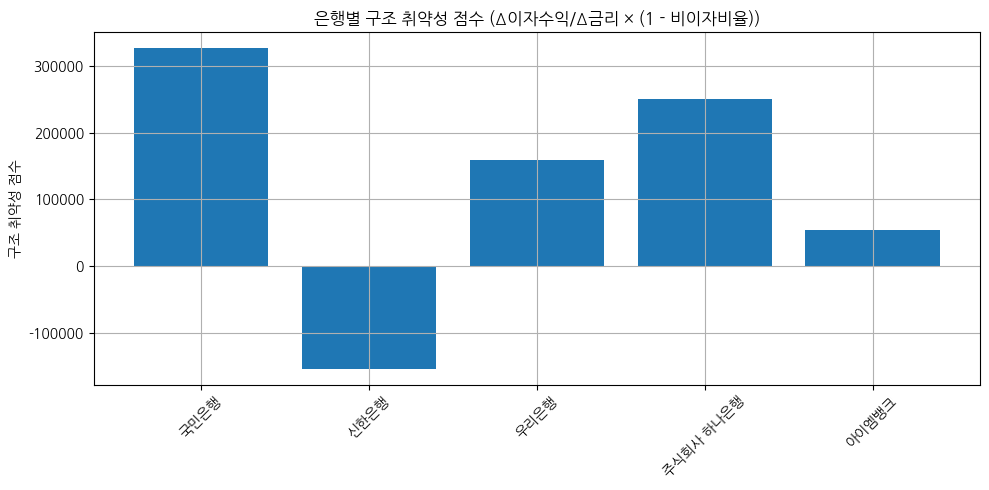

In [28]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 결과 저장
detailed_results = []

# 분석 대상 은행
banks = ['국민은행', '신한은행', '우리은행', '주식회사 하나은행', '아이엠뱅크']

for bank in banks:
    # ΔNIM 분석
    nim_df = df_profit[(df_profit['금융회사'] == bank) & (df_profit['구분'] == '명목순이자마진(NIM)')]
    nim_series = nim_df[valid_periods].T.squeeze().astype(float)
    rate_series = df_ext['기준금리(분기말)'].loc[nim_series.index].astype(float)
    nim_diff = nim_series.diff().dropna()
    rate_diff = rate_series.diff().dropna()
    nim_diff, rate_diff = nim_diff.align(rate_diff, join='inner')
    X_nim = sm.add_constant(rate_diff.values.reshape(-1, 1))
    model_nim = sm.OLS(nim_diff.values, X_nim).fit()

    # Δ이자수익 분석
    int_df = df_profit[(df_profit['금융회사'] == bank) & (df_profit['구분'] == '이자수익')]
    int_series = int_df[valid_periods].T.squeeze().astype(float)
    int_diff = int_series.diff().dropna()
    int_diff, rate_diff2 = int_diff.align(rate_diff, join='inner')
    X_int = sm.add_constant(rate_diff2.values.reshape(-1, 1))
    model_int = sm.OLS(int_diff.values, X_int).fit()

    # 비이자수익비율 계산
    nonint_df = df_profit[(df_profit['금융회사'] == bank) & (df_profit['구분'] == '비이자수익')]
    nonint_series = nonint_df[valid_periods].T.squeeze().astype(float)
    bi_ratio = nonint_series / (nonint_series + int_series)
    bi_mean = bi_ratio.mean()

    # 구조 취약성 점수 (이자수익 민감도 × (1 - 비이자비율))
    beta_adj = model_int.params[1] * (1 - bi_mean)

    detailed_results.append({
        '금융회사': bank,
        'ΔNIM/Δ금리 β': model_nim.params[1],
        'NIM p-value': model_nim.pvalues[1],
        'Δ이자수익/Δ금리 β': model_int.params[1],
        '이자수익 p-value': model_int.pvalues[1],
        '비이자수익비율 평균': bi_mean,
        '구조 취약성 점수': beta_adj
    })

# 데이터프레임으로 정리
detail_df = pd.DataFrame(detailed_results)

# 시각화: 구조 취약성 점수 막대그래프
plt.figure(figsize=(10, 5))
plt.bar(detail_df['금융회사'], detail_df['구조 취약성 점수'])
plt.title("은행별 구조 취약성 점수 (Δ이자수익/Δ금리 × (1 - 비이자비율))")
plt.ylabel("구조 취약성 점수")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
detail_df

,금융회사,ΔNIM/Δ금리 β,NIM p-value,Δ이자수익/Δ금리 β,이자수익 p-value,비이자수익비율 평균,구조 취약성 점수
0,국민은행,0.047244,0.053455,691920.204724,0.000022,0.527791,326731.289695
1,신한은행,0.051496,0.042254,613529.685039,0.000004,1.251510,-154308.693857
2,우리은행,0.069055,0.028486,558418.968504,0.000040,0.714470,159445.157460
3,주식회사 하나은행,0.072835,0.010408,719567.015748,0.000003,0.651686,250635.099817
4,아이엠뱅크,0.089921,0.001058,87112.779528,0.000059,0.371934,54712.538880


| 항목              | 의미                                                |
| --------------- | ------------------------------------------------- |
| **ΔNIM/Δ금리 β**  | 기준금리 변화에 따른 NIM의 민감도                              |
| **NIM p-value** | β의 유의성 (0.05 미만이면 유의)                             |
| **Δ이자수익/Δ금리 β** | 기준금리 변화에 따른 이자수익의 민감도 (단위: 백만원 등)                 |
| **비이자수익비율 평균**  | 비이자수익 / (이자 + 비이자 수익) 평균                          |
| **구조 취약성 점수**   | Δ이자수익/Δ금리 × (1 - 비이자수익비율) → **이자에 의존한 금리 민감도** 반영 |


In [30]:
# 신한은행 수익 시계열 확인
int_df = df_profit[(df_profit["금융회사"] == "신한은행") & (df_profit["구분"] == "이자수익")]
nonint_df = df_profit[(df_profit["금융회사"] == "신한은행") & (df_profit["구분"] == "비이자수익")]

int_series = int_df[valid_periods].T.squeeze().astype(float)
nonint_series = nonint_df[valid_periods].T.squeeze().astype(float)

# 단위 및 음수 확인
print("이자수익 평균:", int_series.mean())
print("비이자수익 평균:", nonint_series.mean())
print("이자수익 최소값:", int_series.min())
print("비이자수익비율:", (nonint_series / (int_series + nonint_series)).mean())


이자수익 평균: 3318185.45
비이자수익 평균: 4679071.65
이자수익 최소값: 1961134.0
비이자수익비율: 1.2515097437333629


In [34]:
print(nonint_series.index)
print(int_series.index)


Index(['20201/4', '20202/4', '20203/4', '20204/4', '20211/4', '20212/4',
       '20213/4', '20214/4', '20221/4', '20222/4', '20223/4', '20224/4',
       '20231/4', '20232/4', '20233/4', '20234/4', '20241/4', '20242/4',
       '20243/4', '20244/4'],
      dtype='object')
Index(['20201/4', '20202/4', '20203/4', '20204/4', '20211/4', '20212/4',
       '20213/4', '20214/4', '20221/4', '20222/4', '20223/4', '20224/4',
       '20231/4', '20232/4', '20233/4', '20234/4', '20241/4', '20242/4',
       '20243/4', '20244/4'],
      dtype='object')


In [35]:
print(((nonint_series + int_series) == 0).sum())  # 0으로 나누는 경우?


0


In [36]:
check_df = pd.DataFrame({
    '이자수익': int_series,
    '비이자수익': nonint_series
})
check_df['합'] = check_df['이자수익'] + check_df['비이자수익']
check_df['비이자수익비율'] = check_df['비이자수익'] / check_df['합']
print(check_df)
print("평균 비이자수익비율:", check_df['비이자수익비율'].mean())
print("최대 비이자수익비율:", check_df['비이자수익비율'].max())


              이자수익       비이자수익           합    비이자수익비율
20201/4  2265446.0   7675337.0   9940783.0   0.772106
20202/4  2176054.0   1100831.0   3276885.0   0.335938
20203/4  2039703.0    921830.0   2961533.0   0.311268
20204/4  1979286.0   5735648.0   7714934.0   0.743447
20211/4  1961134.0   5581093.0   7542227.0   0.739979
20212/4  2003272.0   1103144.0   3106416.0   0.355118
20213/4  2070221.0   5986853.0   8057074.0   0.743055
20214/4  2239418.0   1416743.0   3656161.0   0.387495
20221/4  2430575.0   4706270.0   7136845.0   0.659433
20222/4  2752626.0   8414052.0  11166678.0   0.753496
20223/4  3238532.0  12617133.0  15855665.0   0.795749
20224/4  4021801.0  -4315433.0   -293632.0  14.696739
20231/4  4269030.0   7048700.0  11317730.0   0.622802
20232/4  4439527.0   3264081.0   7703608.0   0.423708
20233/4  4612165.0   5643935.0  10256100.0   0.550300
20234/4  4738362.0   1118407.0   5856769.0   0.190960
20241/4  4703633.0   7318624.0  12022257.0   0.608756
20242/4  4739105.0   5778536

In [51]:
# 런타임 초기화로 인해 파일 및 코드 재실행

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 파일 경로
profit_path = "Data/최종 프로젝트/수익성 지표 데이터.xlsx"
external_path = "Data/최종 프로젝트/외부변수.xlsx"

# 데이터 불러오기
df_profit = pd.read_excel(profit_path)
df_external = pd.read_excel(external_path)

# 열 이름 정리
def convert_quarter(col):
    if '년' in col and '월말' in col:
        year = col[:4]
        month = int(col[5:7])
        quarter = (int(month)-1)//3 + 1
        return f"{year}{quarter}/4"
    return col

df_profit.columns = [convert_quarter(c) for c in df_profit.columns]
valid_periods = [c for c in df_profit.columns if '/4' in c and c >= "20201/4"]

# 외부 변수 정리
df_ext = df_external.set_index("외부변수").T
df_ext.index.name = "분기"
df_ext = df_ext.applymap(lambda x: str(x).replace(",", "")).astype(float)
df_ext = df_ext.loc[df_ext.index >= "20201/4"]

# 분석 대상 은행
banks = ['국민은행', '신한은행', '우리은행', '주식회사 하나은행', '아이엠뱅크']

results = []

for bank in banks:
    int_df = df_profit[(df_profit["금융회사"] == bank) & (df_profit["구분"] == "이자수익")]
    int_series = int_df[valid_periods].T.squeeze().astype(float)

    nonint_df = df_profit[(df_profit["금융회사"] == bank) & (df_profit["구분"] == "비이자수익")]
    nonint_series = nonint_df[valid_periods].T.squeeze().astype(float)

    combined = pd.DataFrame({
        '이자수익': int_series,
        '비이자수익': nonint_series
    }).dropna()
    combined['합'] = combined['이자수익'] + combined['비이자수익']
    combined = combined[combined['합'] > 0]  # 음수/0 제거
    combined['비이자수익비율'] = combined['비이자수익'] / combined['합']
    bi_mean = combined['비이자수익비율'].mean()

    rate_series = df_ext['기준금리(분기말)'].astype(float).loc[combined.index]

    int_diff = combined['이자수익'].diff().dropna()
    rate_diff = rate_series.diff().dropna()
    int_diff, rate_diff = int_diff.align(rate_diff, join='inner')
    X_int = sm.add_constant(rate_diff.values.reshape(-1, 1))
    model_int = sm.OLS(int_diff.values, X_int).fit()

    nim_df = df_profit[(df_profit["금융회사"] == bank) & (df_profit["구분"] == "명목순이자마진(NIM)")]
    nim_series = nim_df[valid_periods].T.squeeze().astype(float)
    nim_diff = nim_series.diff().dropna()
    nim_diff, rate_diff2 = nim_diff.align(rate_diff, join='inner')
    X_nim = sm.add_constant(rate_diff2.values.reshape(-1, 1))
    model_nim = sm.OLS(nim_diff.values, X_nim).fit()

    구조_취약성 = model_int.params[1] * (1 - bi_mean)

    results.append({
        '금융회사': bank,
        'ΔNIM/Δ금리 β': model_nim.params[1],
        'NIM p-value': model_nim.pvalues[1],
        'Δ이자수익/Δ금리 β': model_int.params[1],
        '이자수익 p-value': model_int.pvalues[1],
        '비이자수익비율 평균': bi_mean,
        '구조 취약성 점수': 구조_취약성
    })

# 기존 final_df가 존재한다고 가정
final_df["구조취약성_절대금액"] = final_df["Δ이자수익/Δ금리 β"] * (1 - final_df["비이자수익비율 평균"])
final_df["구조취약성_구조지수"] = final_df["ΔNIM/Δ금리 β"] * (1 - final_df["비이자수익비율 평균"])

final_df.sort_values("구조취약성_구조지수", ascending=False, inplace=True)
final_df

,금융회사,ΔNIM/Δ금리 β,NIM p-value,Δ이자수익/Δ금리 β,이자수익 p-value,비이자수익비율 평균,구조 취약성 점수,구조취약성_절대금액,구조취약성_구조지수
4,아이엠뱅크,0.089921,0.001058,87112.779528,0.000059,0.371934,54712.538880,54712.538880,0.056476
2,우리은행,0.069538,0.014715,657894.153846,0.000016,0.599430,263532.632123,263532.632123,0.027855
3,주식회사 하나은행,0.072835,0.010408,719567.015748,0.000003,0.651686,250635.099817,250635.099817,0.025369
0,국민은행,0.047244,0.053455,691920.204724,0.000022,0.527791,326731.289695,326731.289695,0.022309
1,신한은행,0.020923,0.399903,684152.430769,0.000002,0.543866,312065.133780,312065.133780,0.009544


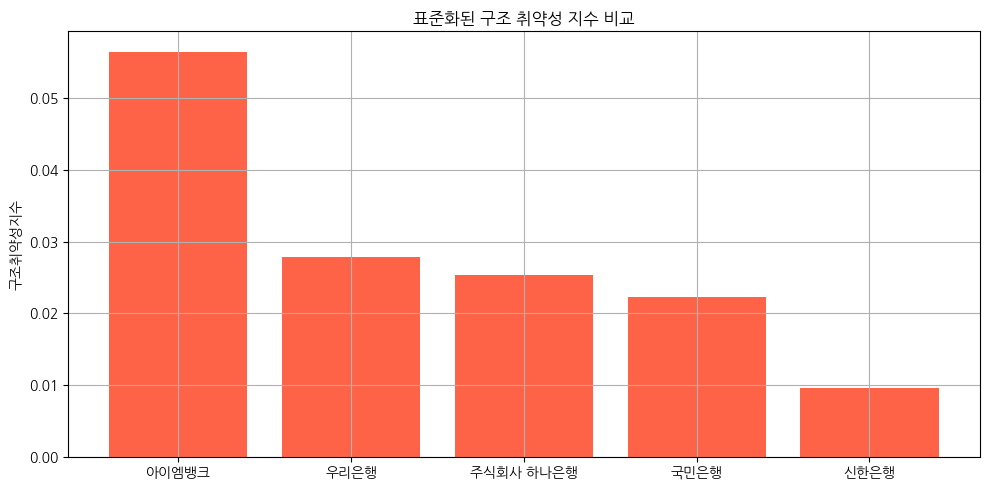

In [52]:
plt.figure(figsize=(10,5))
plt.bar(final_df["금융회사"], final_df["구조취약성_구조지수"], color='tomato')
plt.title("표준화된 구조 취약성 지수 비교")
plt.ylabel("구조취약성지수")
plt.grid(True)
plt.tight_layout()
plt.show()